In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import seaborn as snb; snb.set()
import matplotlib.pyplot as plt

In [4]:
#Data set to prove the diferent clasificators
df=pd.read_csv("diabetes.csv")
df["Diabetes"][df["Diabetes"]==0]=-1
df.head(2)

C:\Users\javie\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,-1


In [5]:
#Separating in predictors and categories 1 is having diabetes and -1 don´t have it
X=df.drop("Diabetes",axis=1).values
y=df["Diabetes"].values

# Separating in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(537, 8) (231, 8)
(537,) (231,)


In [6]:
#Implementation of perceptron  on line version
def perceptron(x,y,paso,nmax_iter):
    x=np.append(np.ones(x.shape[0]).reshape(x.shape[0],1),x,1)
    n=x.shape[1]
    beta=np.zeros(n)
    bc=0
    n_iter=0
    while n_iter<nmax_iter:
        n_iter=n_iter+1
        for i in range(x.shape[0]):
            if (y[i]*beta@x[i,:]<=0):
                beta=beta+paso*y[i]*x[i,:]
            else: bc=bc+1
    return(beta)

#Function to print % of error in clasification using LDA
def train_lda(X_train,X_test,y_train,y_test):
    lf = LDA()
    lf.fit(X_train, y_train)
    Y_train=lf.predict(X_train)
    print("Train error LDA:",np.around((1-sum(Y_train==y_train)/np.shape(y_train))*100,2))
    Y_predic=lf.predict(X_test)
    print("Test error LDA:",np.around((1-sum(Y_predic==y_test)/np.shape(y_test))*100,2))
    #print(Y_predic,y_test)
    return(Y_predic)

#Function to print % of error in clasification using QDA
def train_qda(X_train,X_test,y_train,y_test):
    clf = QDA()
    clf.fit(X_train, y_train)
    Y_train=clf.predict(X_train)
    print("Train error QDA:",np.around((1-sum(Y_train==y_train)/np.shape(y_train))*100,2))
    Y_predic=clf.predict(X_test)
    print("Test error QDA:",np.around((1-sum(Y_predic==y_test)/np.shape(y_test))*100,2))
    #print(Y_predic,y_test)
    return(Y_predic)

#Function to print % of error in clasification using Logistic Regression
def train_logit(X_train,X_test,y_train,y_test):
    clf =  LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
    clf.fit(X_train, y_train)
    Y_train=clf.predict(X_train)
    print("Train error Logit:",np.around((1-sum(Y_train==y_train)/np.shape(y_train))*100,2))
    Y_predic=clf.predict(X_test)
    print("Test error Logit:",np.around((1-sum(Y_predic==y_test)/np.shape(y_test))*100,2))
    return(Y_predic)

In [7]:
beta=perceptron(X_train,y_train,1,3000)
x_test=np.append(np.ones(X_test.shape[0]).reshape(X_test.shape[0],1),X_test,1)
y_pred=np.sign(x_test@beta)
print("Using the implementation of online perceptron")
print("Test error:",np.around((1-sum(y_pred==y_test)/np.shape(y_test))*100,2))
x_train=np.append(np.ones(X_train.shape[0]).reshape(X_train.shape[0],1),X_train,1)
y_predt=np.sign(x_train@beta)
print("Train error:",np.around((1-sum(y_predt==y_train)/np.shape(y_train))*100,2))

Using the implementation of online perceptron
Test error: [25.11]
Train error: [26.44]


In [8]:
y_lda=train_lda(X_train,X_test,y_train,y_test)
y_qda=train_qda(X_train,X_test,y_train,y_test)
y_reglog=train_logit(X_train,X_test,y_train,y_test)

Train error LDA: [22.16]
Test error LDA: [26.84]
Train error QDA: [23.46]
Test error QDA: [23.38]
Train error Logit: [21.79]
Test error Logit: [26.41]


### ROC curves
Behind is shown the Receiver Operating Characteristic curve (ROC) which relate the percentage of true positive on $y$ axis vs false positives percentage in $x$ axis, this is useful to choose between classificators, we choose the ones with higher area under the ROC curve, in this case we choose QDA as the best classificator.

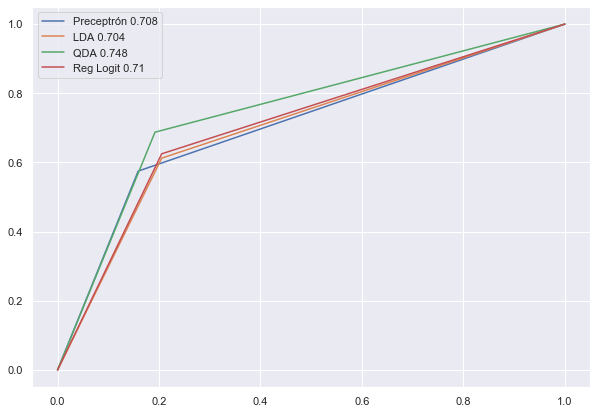

In [295]:
predicciones=[y_pred,y_lda,y_qda,y_reglog]
etiqueta=["Preceptrón","LDA","QDA","Reg Logit"]
plt.figure(figsize=(10, 7))
for i in range(4):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones[i])
    aux=roc_auc_score(y_test, predicciones[i])
    plt.plot(fpr,tpr,label=etiqueta[i]+" "+str(np.around(aux,3)))
    #print(fpr, tpr, thresholds)
    #plt.label(etiqueta)

plt.legend(loc="best")
plt.show()